# Unit 7 - Example 2

Import of Python libraries

In [1]:
## imports
import math
import pandas as pd
from IPython.display import HTML, display


## Der folgende Code dient zur Implementierung der Funktionalität, damit Code ein- und ausgeblendet werden kann.
def toggle_code():
    toggle_code_js_html = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Toggle code"></form>
    '''
    display(HTML(toggle_code_js_html))


toggle_code()

# Exercise

In a German large city the average rental costs per square meter should be determined. It is assumed the the attribute X "rental costs per square meter" in Euro in the population follows a normal distribution. Earlier analyses have shown that the standard deviation of this attribute in the population is 1.50 Euro per m2. In a sample of the size 3000 we get a sample mean of 12,60 Euro per m2. The probability of confidence is set to 99%.  

Construct the confidence interval and visualize the result with a chart.

# Solution

**1. Determing the probability of confidence 1 - $\alpha$**

The probability of confidence is 1 - $\alpha$ = 0.99, d.h. $\alpha$ = 0.01

**2. Determine the z-value**

The z-value for a proability of confidence of 99% is 2.576.

In [2]:
import math
from scipy.stats import t
from scipy.stats import norm

In [3]:
# alpha=0.01, 2-sided
z_value = norm.ppf(1 - (0.01 / 2))
print(z_value.round(3))

2.576


**3. Compute the sample mean $\bar{x}$ and the sample standard deviation s**

The sample mean is 12.60 Euro/m2.

In [4]:
x_mean = 12.6
print(x_mean)

12.6


The standard deviation of the population is 1.50 Euro/m2.

In [5]:
sigma = 1.5
print(sigma)

1.5


**4. Computation of the standard deviation of the sample mean ${\sigma}_\bar{x} = \frac{\sigma}{\sqrt{n}}$**

In [6]:
standard_error = sigma / math.sqrt(3000)
print(standard_error)

0.027386127875258303


**5. Computation of the sample error $\delta = z_{1-\alpha} \sigma_\bar{x}$**

In [8]:
sample_error = z_value * standard_error
print(sample_error)

0.07054199069182772


**6. Construction of the confidence interval $CI = [\bar{x} - z_{1-\alpha} \sigma_\bar{x} ;  \bar{x} + z_{1-\alpha} \sigma_\bar{x}] $**

In [9]:
lower_bound = x_mean - sample_error
upper_bound = x_mean + sample_error
print(lower_bound.round(2), upper_bound.round(2))

12.53 12.67


# Chart

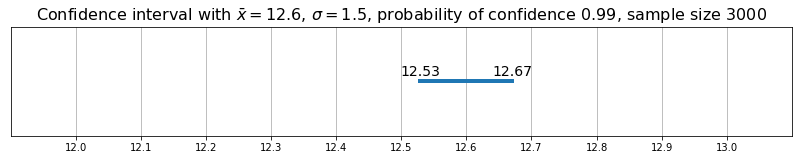

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline


def make_plot(konfp=0.99, sigma=1.5, n=3000):

    loc = 12.6
    
    alpha = 1 - konfp
    z_value = norm.ppf(1 - alpha / 2)
    standard_error = sigma / math.sqrt(n)
    
    lower_bound = loc - z_value * standard_error
    upper_bound = loc + z_value * standard_error
    
    x_values = np.linspace(lower_bound, upper_bound, 100)
    y_values = [1 for i in x_values]

    fig, ax = plt.subplots(figsize=(14, 2))
    ax.plot(x_values, y_values, linewidth=4)

    ## x-Achse
    ##
    plt.xlim(11.9, 13.1)
    ax.set_xticks(np.arange(12, 13.1, 0.1))

    ## y-Achse
    ##
    plt.ylim(0.9, 1.1)
    ax.set_yticks([])
    ax.set_yticklabels([])
    #ax.set_ylabel('$P(x)$', size=14)

    ## Sonstiges
    ##
    ax.set_title(r'Confidence interval with $\bar{x}=12.6$,' 
                 + r' $\sigma=${}, probability of confidence {}, sample size {}'.format(sigma, konfp, n), 
                 size=16)
    ax.grid(True, axis='x')

    ## Text für Untergrenze
    plt.annotate(
        '{:.2f}'.format(lower_bound),
        xy=(lower_bound, 1.01),
        ha='center',
        size=14
    )
    
    ## Text für Obergrenze
    plt.annotate(
        '{:.2f}'.format(upper_bound),
        xy=(upper_bound, 1.01),
        ha='center',
        size=14
    )

    plt.show()

make_plot()
toggle_code()